In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import arviz as az

In [2]:
sns.set()

Probabilistic model:
\begin{align}
 \theta & \sim \rm{Beta}(a, b) \\
 y & \sim \rm{Binomial}(n, \theta)
\end{align}


In [3]:
a = 20 # prior: parameter a
b = 10 # prior: parameter b
n = 50 # likelihood: number of tosses
y_obs = 10 # likelihood: number of HEADs observed. (Fixed in this example. It could be sampled form a binomial instead)

In [4]:
# Approach 1: compute the posterior in closed-form (if you can...)

exact_post_fun = lambda theta: stats.beta.pdf(theta, a+y_obs, b+n-y_obs) # exact posterior

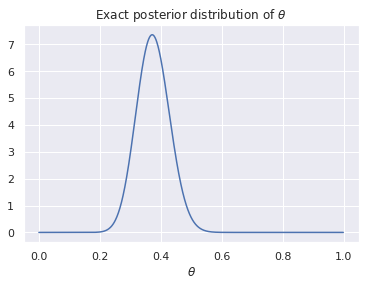

In [5]:
dtheta = 1e-3
theta_vec = np.arange(0, 1, dtheta)
plt.plot(theta_vec, exact_post_fun(theta_vec))
plt.xlabel(r"$\theta$");
plt.title(r"Exact posterior distribution of $\theta$");

In [6]:
# Approach 2: use pymc(3)

with pm.Model():
    theta = pm.Beta("theta", alpha=a, beta=b)
    y = pm.Binomial("y", n=n, p=theta, observed=y_obs)
    trace = pm.sample(1000, random_seed=123, discard_tuned_samples=False)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [7]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.377,0.054,0.278,0.483,0.001,0.001,1890.0,2806.0,1.0


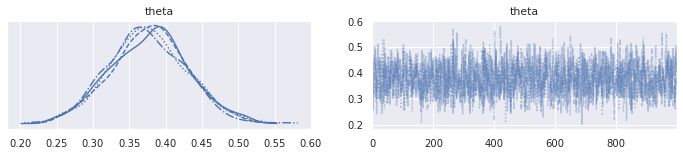

In [8]:
az.plot_trace(trace);

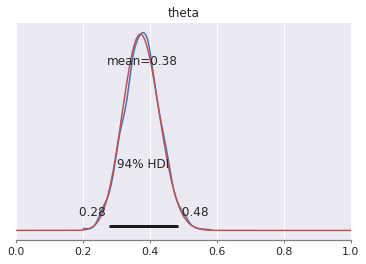

In [9]:
az.plot_posterior(trace, color="b")
plt.plot(theta_vec, exact_post_fun(theta_vec), "r")
plt.xlim([0,1]);

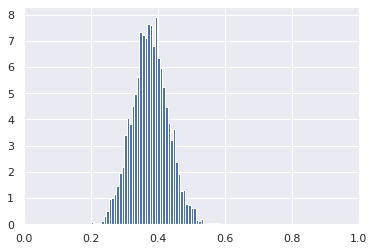

In [10]:
plt.hist(np.array(trace.posterior["theta"]).ravel(), bins=50, density=True);
plt.xlim([0, 1.0]);

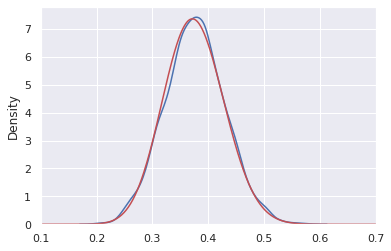

In [11]:
sns.kdeplot(x=np.array(trace.posterior["theta"]).ravel())
plt.plot(theta_vec, exact_post_fun(theta_vec), "r")
plt.xlim([0.1, 0.7]);

In [12]:
chains = np.array(trace.posterior["theta"])
chi

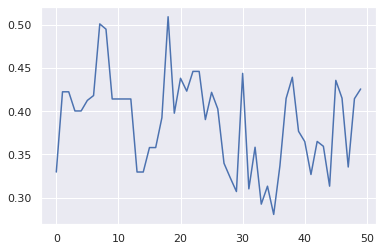

In [13]:
plt.plot(chains[0, 0:50])

In [18]:
trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

Warmup iterations saved (warmup_*).